# D214: Data Analytics Graduate Capstone

## Multiple Linear Regression on Airline On-Time Performance Dataset

Western Governors University
<br>Bailey Psuik 
<br>March 2024

### Part I: Research Question

**A1. Introduction and context**
<br>Flight delays are a common inconvenience not only among travelers but among airlines and airports. In a 2023 study, Anupkumar investigates the costs and economic impacts of flight delays in the aviation industry. This study assessed flight delays from the year 2019 and found that the primary causes were "overscheduling, airport hubbing, late check-ins, technical failure, etc.” (Anupkumar, 2023). While many of these causes are within airlines’ control, some causes of delay are unavoidable, such as inclement weather. 

No matter the cause, it is in the best interest of both the airline and its customers that flight delays are mitigated as much as possible. To effectively address delays, airlines and airports must first gain an understanding of the factors that cause delays in the first place. This study seeks to provide insight into the factors that affect delayed departures and to quantify the impact of each of these factors. 

**A2. Research question**
<br>The research question that this study attempts to answer is: **“Can a predictive model using multiple linear regression (MLR) be constructed with the data?”**

**A3. Hypotheses**
<br>*Null hypothesis (H0)*: A predictive multiple linear regression model cannot be constructed from the dataset. 
<br>*Alternate hypothesis (H1)*: A predictive model can be constructed from the dataset at a model accuracy of 70% or above.

**A4. Justification for the research question**
<br>Prior research that has been done on this topic has provided valuable insight into the impacts of delayed flights, such as Anupkumar’s research cited previously, and on their causes; Kalliguddi and Leboullec analyzed factors that are related to delayed departures in a 2017 study and concluded that the most impactful predictor variables on flight delays were late aircraft delay, carrier delay, weather delay, and National Air System (NAS) delay (Kalliguddi & Leboulluec, 2017). 

Both the question being addressed and the design of this study align closely with Kalliguddi and Leboulluec’s prior work on this topic. Their research was successful in that they were able to construct a reusable model to predict flight delays based on various predictor variables. Their study, however, was done on data from the year 2016. The question of whether or not an accurate predictive model can be built now, with the three most recent months of data (September, October, and November of 2023), will be assessed in this study.

### Part II: Data Collection

**B1. Data collection process**
<br>Data comes from the United States Department of Transportation’s Bureau of Transportation statistics. Data is provided for on-time performance of flights and contains data for January 2018 to November 2023 at the time of this writing. Data is downloadable by month. The most recent three months of data are considered for this analysis: September, October, and November 2023. The raw data set contains 1,840,067 rows (records) and 12 columns (fields).

The full data set contains 120 columns containing flight performance data. 12 relevant predictor variables were selected from these. The variables being used in this analysis are outlined below: 

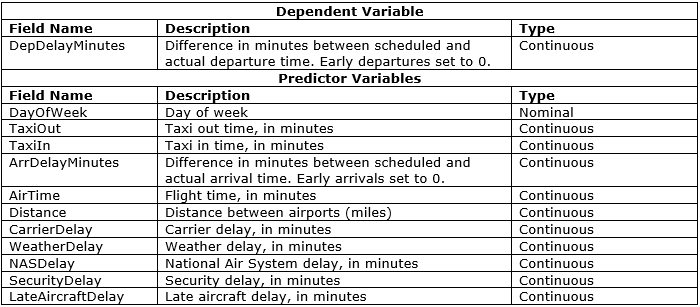

**B2. Advantage and disadvantage of this data gathering methodology**
<br>The advantage of the data gathering methodology used here is that there are many predictor variables to select– 120 to be exact. With a wide selection of predictor variables such as this, the likelihood that an accurate predictive model can be constructed from them is high. 

This advantage is also a disadvantage, however. Building a model with 120 predictor variables would be inefficient and computationally expensive, and could lead to overfitting of a model. Therefore, it is best practice to reduce the number of predictor variables used in the model building process. With such a wide selection, however, it can be difficult to select the optimal number of the most impactful variables to begin constructing the model with.  

**B3. Challenges**
<br>As mentioned, there are many possible predictor variables that could have been selected for this analysis. Both logical reasoning and the prior work by Kalliguddi and Leboullec in 2017 guided the selection of predictor variables for the initial model, helping to overcome the challenge of selecting the best subset of predictor variables.

### Part III: Data Extraction and Preparation

**C1. Data extraction**
<br>Data for on-time flight performance is accessed via the United States Department of Transportation’s Bureau of Transportation statistics website, and is available from January 2018 to November 2023. Data is downloadable by month. This site allows for the selection of all variables to be downloaded, or just a subset of these variables. For this study, only the 12 variables outlined in the table above are selected, Data was downloaded as .csv files for September 2023, October 2023, and November 2023.

**C2. Data preparation**
<br>The first step in the data preparation process, after relevant packages were imported, was to import the three individual data files and aggregate them into one dataframe.

In [33]:
# IMPORT PACKAGES

# Arrays and dataframes
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split
from sklearn.model_selection import train_test_split

# OLS model building & evaluation
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Dataframe standardization
from sklearn import preprocessing

# Q-Q plot
import pylab 
from scipy.stats import probplot

# Decision tree
from sklearn.tree import DecisionTreeRegressor

# Random forest
from sklearn.ensemble import RandomForestRegressor

In [2]:
# IMPORT DATA
# Data is downloaded by month. Import individually.
sept = pd.read_csv("C:/Users/psuik/Desktop/WGU/D214/sept2023.csv")
oct = pd.read_csv("C:/Users/psuik/Desktop/WGU/D214/oct2023.csv")
nov = pd.read_csv("C:/Users/psuik/Desktop/WGU/D214/nov2023.csv")

# Aggregate into one dataframe, df
df = pd.concat([sept, oct, nov])

With the data now aggregated, initial data exploration is done below.

In [3]:
# INITIAL EXPLORATION
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1840067 entries, 0 to 599813
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DAY_OF_WEEK          int64  
 1   DEP_DELAY_NEW        float64
 2   TAXI_OUT             float64
 3   TAXI_IN              float64
 4   ARR_DELAY_NEW        float64
 5   AIR_TIME             float64
 6   DISTANCE             int64  
 7   CARRIER_DELAY        float64
 8   WEATHER_DELAY        float64
 9   NAS_DELAY            float64
 10  SECURITY_DELAY       float64
 11  LATE_AIRCRAFT_DELAY  float64
dtypes: float64(10), int64(2)
memory usage: 182.5 MB


In [4]:
df.shape

(1840067, 12)

In [5]:
df.head()

,DAY_OF_WEEK,DEP_DELAY_NEW,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,0.0,10.0,5.0,0.0,82.0,481,NaN,NaN,NaN,NaN,NaN
1,1,0.0,12.0,4.0,0.0,77.0,481,NaN,NaN,NaN,NaN,NaN
2,1,0.0,13.0,3.0,0.0,69.0,481,NaN,NaN,NaN,NaN,NaN
3,1,0.0,13.0,4.0,0.0,69.0,481,NaN,NaN,NaN,NaN,NaN
4,1,0.0,14.0,6.0,0.0,75.0,481,NaN,NaN,NaN,NaN,NaN


The next step was to clean the aggregated data frame. This is accomplished by identifying and treating: 
* Duplicate records
* Missing values
* Outliers

In [6]:
# DATA CLEANING

# Check for duplicate records (complete duplicates):

# Get total counts of duplicate records
print(df.duplicated().value_counts())

False    1790809
True       49258
Name: count, dtype: int64


In [7]:
# 2.6% of values are duplicates. With this low percentage, dropping duplicates will have a minimal impact on analysis

# Drop duplicates
df.drop_duplicates(inplace=True)

# Confirm
print(df.duplicated().value_counts())

False    1790809
Name: count, dtype: int64


In [8]:
# Check for missing values 

# Get sum of null values in each column
print(df.isnull().sum())

DAY_OF_WEEK                  0
DEP_DELAY_NEW             3219
TAXI_OUT                  3762
TAXI_IN                   4089
ARR_DELAY_NEW             6819
AIR_TIME                  6819
DISTANCE                     0
CARRIER_DELAY          1501642
WEATHER_DELAY          1501642
NAS_DELAY              1501642
SECURITY_DELAY         1501642
LATE_AIRCRAFT_DELAY    1501642
dtype: int64


In [9]:
# Missing values in _DELAY columns are equal to 0 and will be imputed

df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['NAS_DELAY'] = df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)

In [10]:
# Visual inspection of the raw data shows rows with missing DEP_DELAY_NEW also have missing values for TAXI_IN, TAXI_OUT, ARR_DELAY_NEW, & AIR_TIME
# These missing values each make up less than .05% of the rows in their respective column, so dropping these missing values will have minimal impact

# Drop records with missing values
df.dropna(subset=['DEP_DELAY_NEW', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY_NEW', 'AIR_TIME'], inplace=True)

# Confirm
print(df.isnull().sum())

DAY_OF_WEEK            0
DEP_DELAY_NEW          0
TAXI_OUT               0
TAXI_IN                0
ARR_DELAY_NEW          0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64


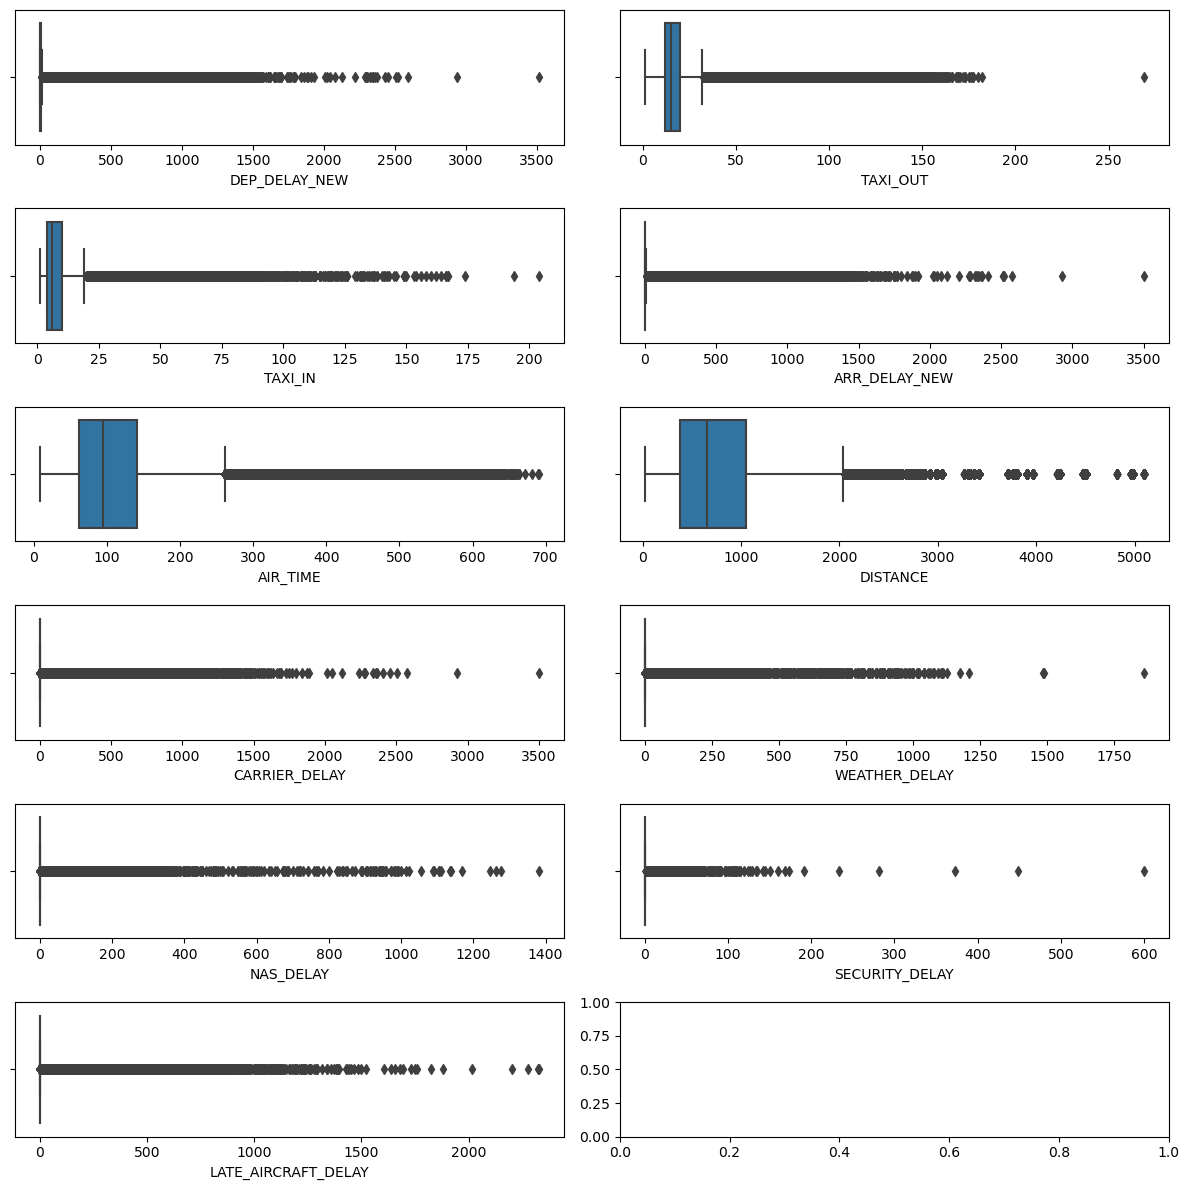

In [11]:
# Check for outliers in quantitative variables 

# Visually show outliers for each quantitative variable on respective box plots

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 12))

plt.subplot(6, 2, 1)
sns.boxplot(x='DEP_DELAY_NEW', data=df)

plt.subplot(6, 2, 2)
sns.boxplot(x='TAXI_OUT', data=df)

plt.subplot(6, 2, 3)
sns.boxplot(x='TAXI_IN', data=df)

plt.subplot(6, 2, 4)
sns.boxplot(x='ARR_DELAY_NEW', data=df)

plt.subplot(6, 2, 5)
sns.boxplot(x='AIR_TIME', data=df)

plt.subplot(6, 2, 6)
sns.boxplot(x='DISTANCE', data=df)

plt.subplot(6, 2, 7)
sns.boxplot(x='CARRIER_DELAY', data=df)

plt.subplot(6, 2, 8)
sns.boxplot(x='WEATHER_DELAY', data=df)

plt.subplot(6, 2, 9)
sns.boxplot(x='NAS_DELAY', data=df)

plt.subplot(6, 2, 10)
sns.boxplot(x='SECURITY_DELAY', data=df)

plt.subplot(6, 2, 11)
sns.boxplot(x='LATE_AIRCRAFT_DELAY', data=df)

plt.tight_layout()
plt.show()

Visual inspection of the boxplots reveals that: 
* Most of the variables used here are right skewed. This is due to the fact most of these variables are zero-inflated.
* None of these variables follow a normal distribution.

Even so, the range of values falls into an acceptable range and does not indicate the cause of human or machine error in inputting any of these values. Therefore, all values for each variable will be retained in this step.

**C3. Exploratory data analysis**
<br> Univariate and bivariate graphs can provide a better understanding of the data set through visualization. As this analysis seeks to use MLR, it is important to note that one of the assumptions of MLR is that a linear relationship exists between the dependent variable and each predictor variable. Findings from the visualizations created in this step will be assessed later on in this report when determining if any of the assumptions of MLR are violated. This, and the other assumptions of MLR are expanded upon in later sections of this report.

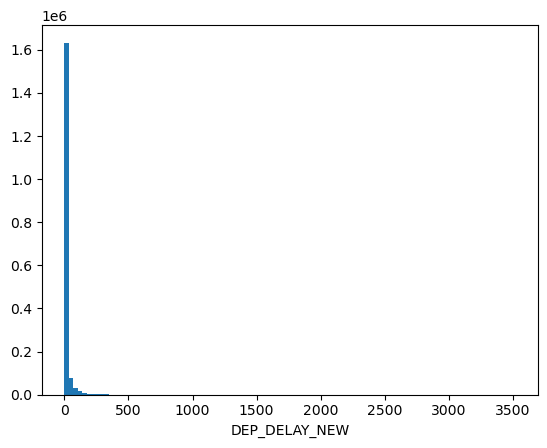

In [12]:
# Dependent variable: DEP_DELAY_NEW
plt.hist(df['DEP_DELAY_NEW'], bins=100)
plt.xlabel('DEP_DELAY_NEW')
plt.show()

<Axes: xlabel='DAY_OF_WEEK', ylabel='DEP_DELAY_NEW'>

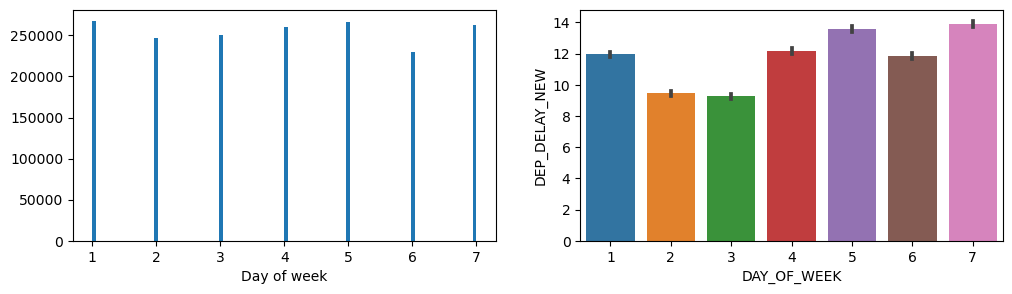

In [13]:
# Day of week
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(df['DAY_OF_WEEK'], bins=100)
plt.xlabel('Day of week')

plt.subplot(1, 2, 2)
sns.barplot(x='DAY_OF_WEEK',y='DEP_DELAY_NEW',data=df)

<Axes: xlabel='TAXI_OUT', ylabel='DEP_DELAY_NEW'>

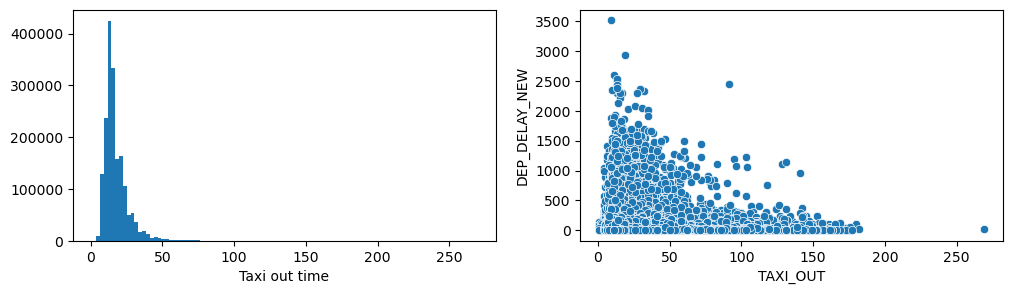

In [14]:
# Taxi out
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(df['TAXI_OUT'], bins=100)
plt.xlabel('Taxi out time')

plt.subplot(1, 2, 2)
sns.scatterplot(x='TAXI_OUT',y='DEP_DELAY_NEW',data=df)

<Axes: xlabel='TAXI_IN', ylabel='DEP_DELAY_NEW'>

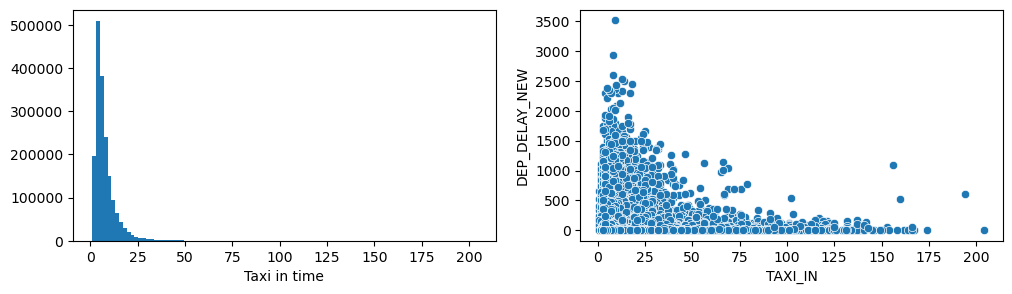

In [15]:
# Taxi in
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(df['TAXI_IN'], bins=100)
plt.xlabel('Taxi in time')

plt.subplot(1, 2, 2)
sns.scatterplot(x='TAXI_IN',y='DEP_DELAY_NEW',data=df)

<Axes: xlabel='ARR_DELAY_NEW', ylabel='DEP_DELAY_NEW'>

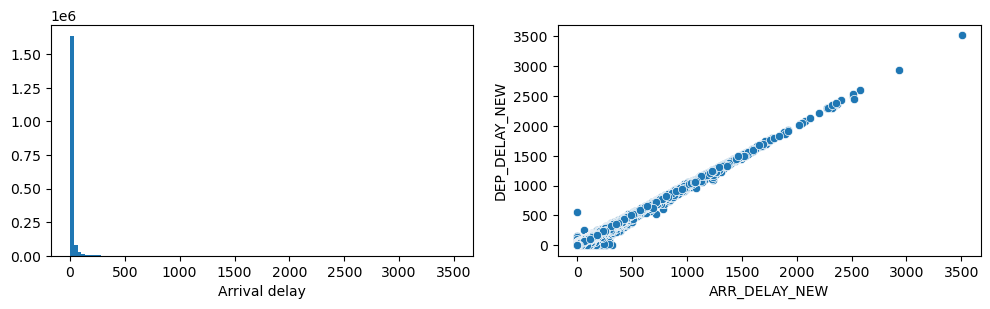

In [16]:
# Arrival delay
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(df['ARR_DELAY_NEW'], bins=100)
plt.xlabel('Arrival delay')

plt.subplot(1, 2, 2)
sns.scatterplot(x='ARR_DELAY_NEW',y='DEP_DELAY_NEW',data=df)

<Axes: xlabel='AIR_TIME', ylabel='DEP_DELAY_NEW'>

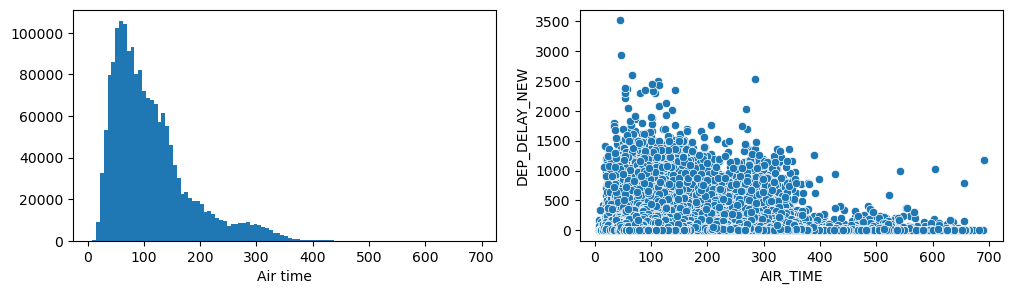

In [17]:
# Air time
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(df['AIR_TIME'], bins=100)
plt.xlabel('Air time')

plt.subplot(1, 2, 2)
sns.scatterplot(x='AIR_TIME',y='DEP_DELAY_NEW',data=df)

<Axes: xlabel='DISTANCE', ylabel='DEP_DELAY_NEW'>

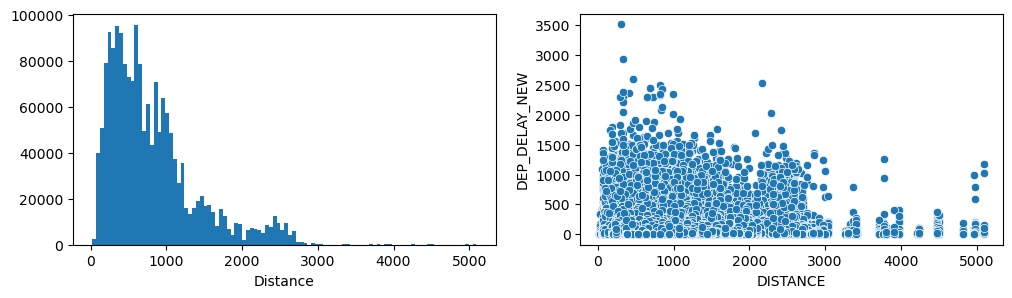

In [18]:
# Distance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(df['DISTANCE'], bins=100)
plt.xlabel('Distance')

plt.subplot(1, 2, 2)
sns.scatterplot(x='DISTANCE',y='DEP_DELAY_NEW',data=df)

<Axes: xlabel='CARRIER_DELAY', ylabel='DEP_DELAY_NEW'>

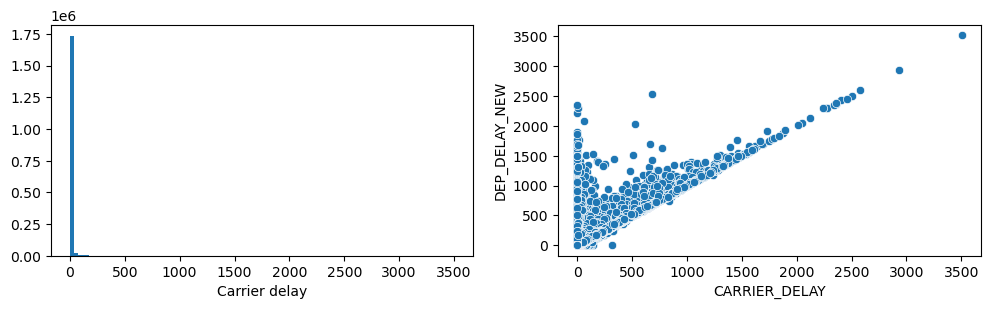

In [19]:
# Carrier delay
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(df['CARRIER_DELAY'], bins=100)
plt.xlabel('Carrier delay')

plt.subplot(1, 2, 2)
sns.scatterplot(x='CARRIER_DELAY',y='DEP_DELAY_NEW',data=df)

<Axes: xlabel='WEATHER_DELAY', ylabel='DEP_DELAY_NEW'>

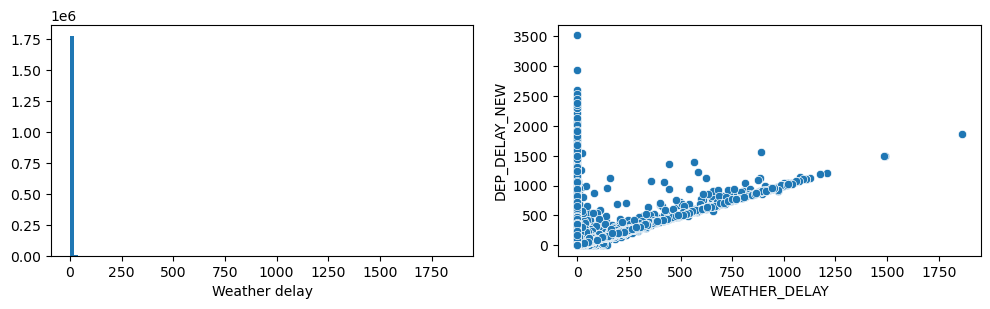

In [20]:
# Weather delay
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(df['WEATHER_DELAY'], bins=100)
plt.xlabel('Weather delay')

plt.subplot(1, 2, 2)
sns.scatterplot(x='WEATHER_DELAY',y='DEP_DELAY_NEW',data=df)

<Axes: xlabel='NAS_DELAY', ylabel='DEP_DELAY_NEW'>

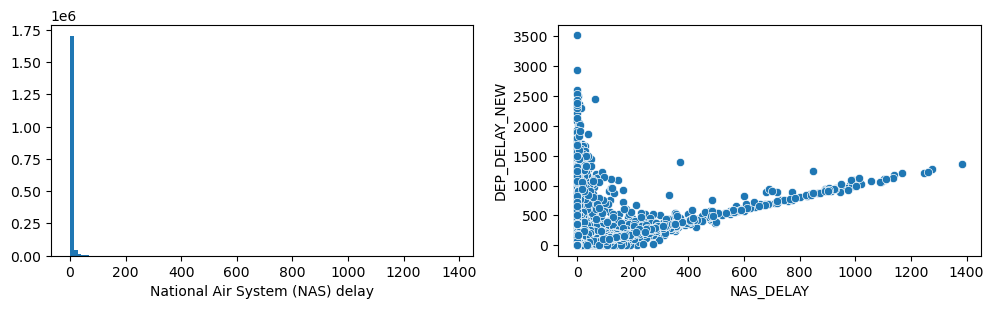

In [21]:
# NAS delay
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(df['NAS_DELAY'], bins=100)
plt.xlabel('National Air System (NAS) delay')

plt.subplot(1, 2, 2)
sns.scatterplot(x='NAS_DELAY',y='DEP_DELAY_NEW',data=df)

<Axes: xlabel='SECURITY_DELAY', ylabel='DEP_DELAY_NEW'>

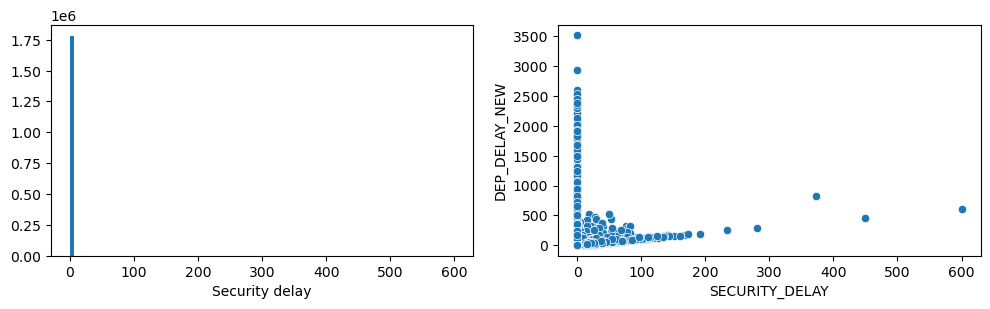

In [22]:
# Security delay
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(df['SECURITY_DELAY'], bins=100)
plt.xlabel('Security delay')

plt.subplot(1, 2, 2)
sns.scatterplot(x='SECURITY_DELAY',y='DEP_DELAY_NEW',data=df)

<Axes: xlabel='LATE_AIRCRAFT_DELAY', ylabel='DEP_DELAY_NEW'>

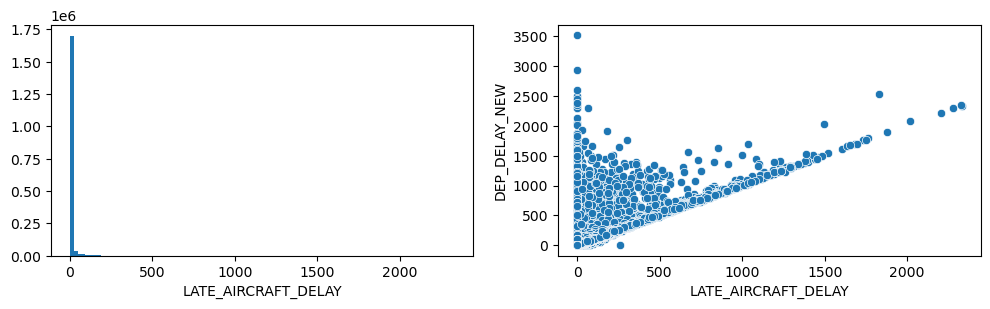

In [23]:
# late aircraft delay
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(df['LATE_AIRCRAFT_DELAY'], bins=100)
plt.xlabel('LATE_AIRCRAFT_DELAY')

plt.subplot(1, 2, 2)
sns.scatterplot(x='LATE_AIRCRAFT_DELAY',y='DEP_DELAY_NEW',data=df)

**C4. Tools and techniques**
<br>The United States Department of Transportation’s Bureau of Transportation statistics website is used for extracting the data used in this analysis. Python programming language is utilized by way of a Jupyter notebook to complete all data preparation steps. As demonstrated in the code above, Python code is written to: import the necessary packages for this analysis, import the data, aggregate the data, and clean the data. 

**C5. Justification of tools and techniques**
<br>While both Python and R have valuable statistical capabilities, Python is selected for this analysis for its machine learning abilities and large-scale applications (IBM Cloud Team, 2021). As the eventual goal of this analysis is to construct a predictive model, this falls under the umbrella of machine learning, making Python the more optimal programming language for this analysis. SAS is another widely used programming language, although it is not open-source like Python and R. Unless a user pays for access, they will be unable to view the source code in SAS (Geeks for Geeks, 2023). In the interest of transparency and reproducibility, Python remains the optimal programming language for this analysis. 

**C6. Advantage and disadvantage data preparation techniques**
<br>An advantage of using Python for data preparation is that Python has a wide range of libraries like Pandas, NumPy, Matplotlib, and more that allow for working with data frames and arrays, and visualizing data for exploratory data analysis. Its “straightforward syntax and ease of use enable data scientists to perform complex tasks and handle vast amounts of data” (Chatterjee, 2023). 
While Python has many capabilities, however, a disadvantage is that it can have slow runtimes when working with large data sets such as the one used in this analysis with its 1.8 million records (Geeks for Geeks, 2023). This slow runtime and high memory consumption are drawbacks to this choice of programming language.

### Part IV: Analysis

**D1. Analysis techniques**
<br>The primary analysis technique that this study focuses on is regression analysis, specifically multiple linear regression (MLR). The research question being investigated, *“Can a predictive model using multiple linear regression (MLR) be constructed with the data?”*, will be answered by the performance metrics of this model, namely its accuracy (measured by its r-squared value) and its statistical significance (measured by its Prob (F-statistic)), both of which are outputs of the summary of ordinary least squares (OLS) models such as the one constructed for this analysis.

While on the surface this will be sufficient in providing an answer to the research question and to whether or not the null hypothesis can be rejected, the outcome of this study will be further investigated with the techniques listed below to determine whether or not the assumptions of MLR are met.

Assumptions of MLR: 
A multiple linear regression model operates with the following assumptions (Statistics Solutions, n.d.):
* There is a linear relationship between the predictor variables and the dependent variable.
    * *Relationships between the predictor variables and the dependent variable are demonstrated by the bivariate graphs in the previous section.*
* Multivariate normality is upheld. In other words, residual values are normally distributed.
* No multivariate collinearity exists, meaning explanatory variables are not highly correlated with one another.
* Homoscedasticity is evident. The variance of error terms are similar for each explanatory variable.

These additional techniques will provide insight as to whether or not the assumptions of MLR are met: 
* Residual analysis: The residual values, or the difference between the actual values and predicted values of the dependent variable, will be visualized and assessed through use of a residual plot. The residual standard error (RSE), which measures of the typical size of residuals, will also be calculated. This indicates how much the predictions are typically off by. The smaller the RSE, the more accurate the model is at predicting outcomes of the dependent variable. 

* Q-Q plot (quantile-quantile plot): By plotting the quantiles of two variables against one another, it can be determined whether the distributions of two variables are similar or not (Geeks for Geeks, 2023). To assess the MLR model in this instance, the actual values and predicted values will be plotted against one another. This plot helps to visualize whether or not the model is homoscedastic; in other words, whether or not the model's residuals follow a straight line (the reference line).

* VIF (variance inflation factor): Multicollinearity will be assessed by calculating the VIF of each predictor variable in the initial model. Predictor variables with high multicollinearity (VIF > 10) will be dropped, and the model will be reconstructed with only those predictor variables with low multicollinearity. This reconstructed model will indicate whether or not the model's accuracy can be improved by this approach. This evaluates the model's multicollinearity.

* Decision tree: Another method for predicting values of a dependent variable is the use of a decision tree. "Decision trees involve stratifying or segmenting the predictor space into several simple regions to make a prediction for a given observation (Kalliguddi & Leboulluec, 2017). The accuracy score of the decision tree constructed from the original data frame will be assessed and compared to the accuracy score of the initial MLR.

* Random forest: Random forests are an extension of decision trees. "They consist of a collection of decision trees that grow in parallel to each other and help in reduction of variance in the model (Kalliguddi & Leboulluec, 2017). The accuracy score of the random forest model will also be assessed and compared to the accuracy score of the initial MLR.

For the construction of the MLR, decision tree, and random forest, the data will be split into train and test sets, with 80% of data comprising the train set and 20% comprising the test set. These models will be trained (fit) on the training set, and evaluated for accuracy using the unseen data in the test set.

**D2. Justification of analysis techniques**
<br>MLR is selected as the primary analysis technique due to its ability to quantify the impact of predictor variables on the dependent variable. An OLS model is constructed to carry out MLR because its summary includes relevant performance metrics for the model, such as r-squared and a Prob (F-statistic), which are necessary for answering the research question at hand and rejecting (or failing to reject) the null hypothesis. 

The additional analysis techniques used here are selected to: 1) Assess whether or not the assumptions of MLR are met, and 2) Assess the accuracy scores of other techniques for predicting values of a continuous dependent variable.

**D3. Advantage and disadvantage of analysis techniques**
<br>In the context of the main analysis technique, MLR, the advantage of building an OLS model is that the summary of an OLS model calculates the statistics needed to answer the research question: r-squared and the Prob (F-statistic). These metrics are calculated along with the coefficients for each predictor variable, which are necessary in providing a final equation to quantify these variables' impacts.

The disadvantage to using OLS is that training the model is not as straightforward of a process as it would be with constructing a linear regression model with scikit-learn's LinearRegression package. 

**D4. Calculations and outputs**
<br>All calculations performed to carry out this analysis, along with their outputs, are included in the code following this section.

In [24]:
# BUILDING THE INITIAL MODEL

# Create X and y from the orignal data frame, df
X = df[['DAY_OF_WEEK', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY_NEW', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].assign(const=1)
y = df['DEP_DELAY_NEW']

# Examine correlation of predictor variables with a correlation matrix
X.corr()

,DAY_OF_WEEK,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,const
DAY_OF_WEEK,1.000000,0.007712,0.015206,0.023221,0.007073,0.008864,0.011960,0.002844,0.016700,0.002569,0.016832,NaN
TAXI_OUT,0.007712,1.000000,0.004392,0.122471,0.043792,0.034674,0.032592,0.041096,0.278260,-0.000321,0.018736,NaN
TAXI_IN,0.015206,0.004392,1.000000,0.062356,0.082417,0.073540,0.012676,0.008361,0.156511,0.000298,0.011364,NaN
ARR_DELAY_NEW,0.023221,0.122471,0.062356,1.000000,0.015929,0.008877,0.731124,0.255979,0.304334,0.032107,0.619796,NaN
AIR_TIME,0.007073,0.043792,0.082417,0.015929,1.000000,0.985702,0.013718,-0.007220,0.035151,0.002248,-0.004666,NaN
DISTANCE,0.008864,0.034674,0.073540,0.008877,0.985702,1.000000,0.012355,-0.009095,0.016411,0.001802,-0.004446,NaN
CARRIER_DELAY,0.011960,0.032592,0.012676,0.731124,0.013718,0.012355,1.000000,-0.003388,0.025680,0.002051,0.058499,NaN
WEATHER_DELAY,0.002844,0.041096,0.008361,0.255979,-0.007220,-0.009095,-0.003388,1.000000,0.024961,-0.000302,0.022385,NaN
NAS_DELAY,0.016700,0.278260,0.156511,0.304334,0.035151,0.016411,0.025680,0.024961,1.000000,0.006293,0.038205,NaN
SECURITY_DELAY,0.002569,-0.000321,0.000298,0.032107,0.002248,0.001802,0.002051,-0.000302,0.006293,1.000000,0.006309,NaN


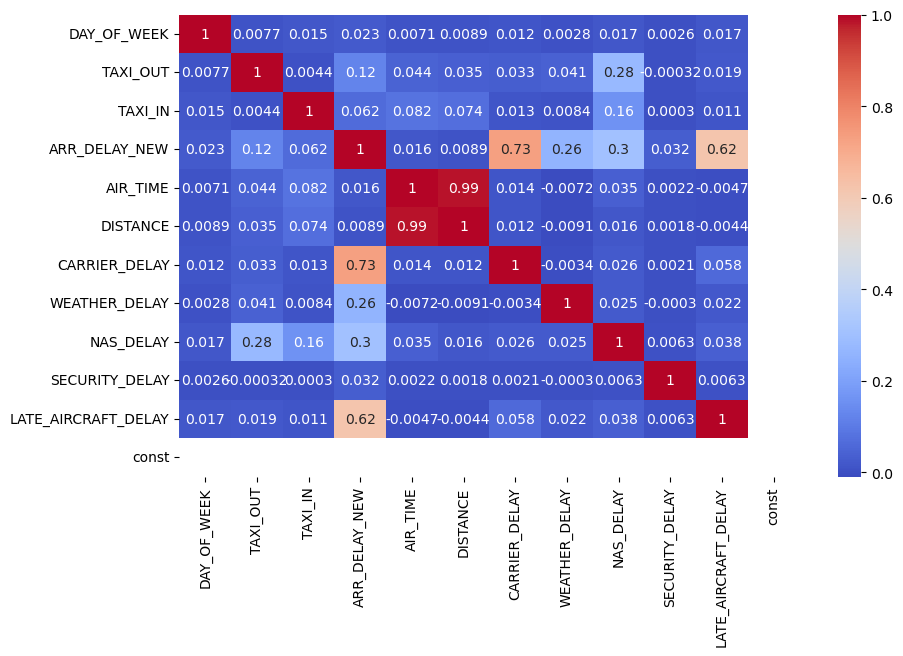

In [25]:
# Examine correlation of predictor variables with a heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(X.corr(), cmap="coolwarm", annot=True)

In [26]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Create the OLS model with the train data
model = sm.OLS(y_train, X_train)

# Fit the model, using the training data
results = model.fit()

# Print the results summary of the OLS model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          DEP_DELAY_NEW   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 6.814e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:38:18   Log-Likelihood:            -4.6871e+06
No. Observations:             1427192   AIC:                         9.374e+06
Df Residuals:                 1427180   BIC:                         9.374e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
DAY_OF_WEEK             0.0203    

In [27]:
# This is the summary of the model built using the training data only

# Currently the coefficients are not comparable because they are on different scales
# To fix this, the values will be normalized using their z-scores

# Create a new data frame for the calculated z-scores for each variable
df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df), columns=df.columns)
df_zscore.head()

,DAY_OF_WEEK,DEP_DELAY_NEW,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,-1.48391,-0.2503,-0.847571,-0.506998,-0.247507,-0.426940,-0.556339,-0.12744,-0.041157,-0.146256,-0.019693,-0.157067
1,-1.48391,-0.2503,-0.619222,-0.672280,-0.247507,-0.498939,-0.556339,-0.12744,-0.041157,-0.146256,-0.019693,-0.157067
2,-1.48391,-0.2503,-0.505047,-0.837563,-0.247507,-0.614138,-0.556339,-0.12744,-0.041157,-0.146256,-0.019693,-0.157067
3,-1.48391,-0.2503,-0.505047,-0.672280,-0.247507,-0.614138,-0.556339,-0.12744,-0.041157,-0.146256,-0.019693,-0.157067
4,-1.48391,-0.2503,-0.390873,-0.341715,-0.247507,-0.527739,-0.556339,-0.12744,-0.041157,-0.146256,-0.019693,-0.157067


In [28]:
# Redefine X and y based on the data frame of z-scores
X = df_zscore[['DAY_OF_WEEK', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY_NEW', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].assign(const=1)
y = df_zscore['DEP_DELAY_NEW']

# Follow the same process used to build the initial model, now with X and y redefined

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Create the OLS model with the train data
model = sm.OLS(y_train, X_train)

# Fit the model, using the training data
results = model.fit()

# Print the results summary of the OLS model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          DEP_DELAY_NEW   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 6.814e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:             8.0931e+05
No. Observations:             1427192   AIC:                        -1.619e+06
Df Residuals:                 1427180   BIC:                        -1.618e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
DAY_OF_WEEK             0.0009    

In [29]:
# This model, the one constructed on the normalized data frame, is the one that will be used to answer the initial research question.

#  “Can a predictive model using multiple linear regression (MLR) be constructed with the data?”
# H0: A predictive multiple linear regression model cannot be constructed from the dataset. 
# H1: A predictive model can be constructed from the dataset at a model accuracy of 70% or above.

if results.f_pvalue < 0.05 and results.rsquared >= 0.70:
    print("Reject the null hypothesis: A predictive model can be built from this data with an accuracy of 0.70 or 70% or above.")
else: 
    print("Fail to reject tne null hypothesis: A predictive model cannot be built from this data.")

Reject the null hypothesis: A predictive model can be built from this data with an accuracy of 0.70 or 70% or above.


Text(0, 0.5, 'Residuals')

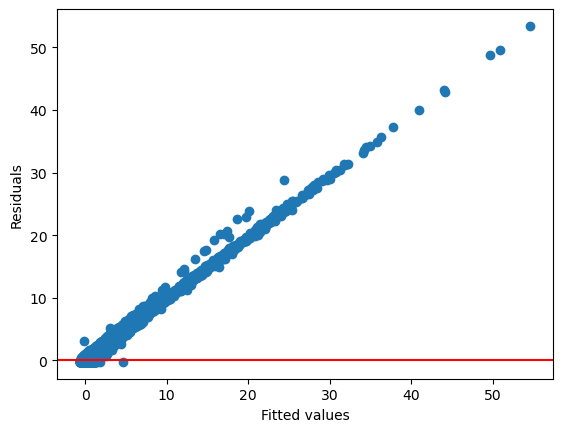

In [30]:
# At the simplest level, the null hypothesis is rejected, as the model's accuracy is 0.981 and its significance level is 0.00. 
# This result will be investigated further so as to corroborate this model's findings.


# RESIDUAL ANALYSIS 
# residuals = (actual values of DEP_DELAY_NEW) - (predicted values of DEP_DELAY_NEW)

# To calculate this, the predicted y values must first be calculated: y_pred
y_pred = results.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, y_test)
plt.axhline(y=0, color='r')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [31]:
# Calculate residual standard error (RSE)

mse = results.mse_resid
rse = np.sqrt(mse)
print("Residual standard error: ", rse)

Residual standard error:  0.13724358504851572


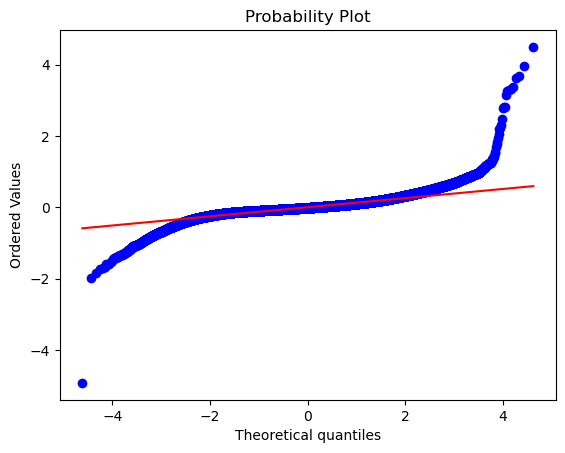

In [35]:
# Q-Q PLOT

probplot(residuals, dist="norm", plot=pylab)
pylab.show()

In [36]:
# VIF

# Using VIF to check for multicollinearity among predictor variables in the original data
# VIF: variance inflation factor = 1 / (1-R2)

# Define a function to calculate VIF
# (Keith, 2021)

def vif(df):
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    
    # Initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # Loop through each column (excluding 'const')
    for col in df.drop(columns=['const']):
        # Form input data for each exogenous variable
        y = df[col]
        X = df.drop(columns=[col])
    
        # Extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # Calculate VIF
        # Prevent division by zero runtime error
        if r_squared < 1: 
            vif = 1 / (1 - r_squared)
        else: 
            vif = 100
        vif_dict[col] = vif

    # Generate the DataFrame to return
    df_output = pd.DataFrame({'VIF': vif_dict})
    
    return df_output.sort_values(by=['VIF'], ascending=False)

In [37]:
# X needs to be redefined, as its previous values come from the dataframe of z-scores
X = df[['DAY_OF_WEEK', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY_NEW', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].assign(const=1)

# Calculate VIF for X
vif(X)

,VIF
ARR_DELAY_NEW,292.285839
CARRIER_DELAY,140.953705
LATE_AIRCRAFT_DELAY,93.931015
AIR_TIME,36.056133
DISTANCE,35.968189
NAS_DELAY,20.170002
WEATHER_DELAY,17.685197
SECURITY_DELAY,1.191371
TAXI_OUT,1.109820
TAXI_IN,1.041606


In [38]:
# REDUCED MODEL
#The general rule for VIF treatment is to remove any variables with a VIF greater than 10. 
#The lower the VIF score, the better. 
#Generally, a score less than 10 is adequate; less than 5 is good; and less than 3 is ideal (Keith, 2021).

# Based on this, keep only: SECURITY_DELAY, TAXI_OUT, TAXI_IN, DAY_OF_WEEK

# Repeat the same process used for constructing the original model
X_vif = df[['SECURITY_DELAY', 'TAXI_OUT', 'TAXI_IN', 'DAY_OF_WEEK']].assign(const=1)
y = df['DEP_DELAY_NEW']

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.2, random_state=24)

# Create the OLS model with the train data
model = sm.OLS(y_train, X_train)

# Fit the model, using the training data
results = model.fit()

# Print the results summary of the OLS model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          DEP_DELAY_NEW   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     943.2
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:41:16   Log-Likelihood:            -7.5254e+06
No. Observations:             1427192   AIC:                         1.505e+07
Df Residuals:                 1427187   BIC:                         1.505e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
SECURITY_DELAY     1.2754      0.031     40.

In [39]:
# A dataframe of z-scores has already been created, so redefine X and y from it

X = df_zscore[['SECURITY_DELAY', 'TAXI_OUT', 'TAXI_IN', 'DAY_OF_WEEK']].assign(const=1)
y = df_zscore['DEP_DELAY_NEW']

# Follow the same process used before

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Create the OLS model with the train data
model = sm.OLS(y_train, X_train)

# Fit the model, using the training data
results = model.fit()

# Print the results summary of the OLS model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          DEP_DELAY_NEW   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     943.2
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:41:19   Log-Likelihood:            -2.0289e+06
No. Observations:             1427192   AIC:                         4.058e+06
Df Residuals:                 1427187   BIC:                         4.058e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
SECURITY_DELAY     0.0328      0.001     40.

In [40]:
# Assess the reduced model using the same criteria as before

#  “Can a predictive model using multiple linear regression (MLR) be constructed with the data?”
# H0: A predictive multiple linear regression model cannot be constructed from the dataset. 
# H1: A predictive model can be constructed from the dataset at a model accuracy of 70% or above.

if results.f_pvalue < 0.05 and results.rsquared >= 0.70:
    print("Reject the null hypothesis: A predictive model can be built from this data with an accuracy of 0.70 or 70% or above.")
else: 
    print("Fail to reject tne null hypothesis: A predictive model cannot be built from this data.")

Fail to reject tne null hypothesis: A predictive model cannot be built from this data.


In [41]:
# DECISION TREE CONSTRUCTION

# Redefine X and y from the original data frame
X = df[['DAY_OF_WEEK', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY_NEW', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].assign(const=1)
y = df['DEP_DELAY_NEW']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

# Decision tree instantiation and fitting (George, n.d.)
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [42]:
# Evaluate
print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

0.9737987939611286
0.9732744517763072


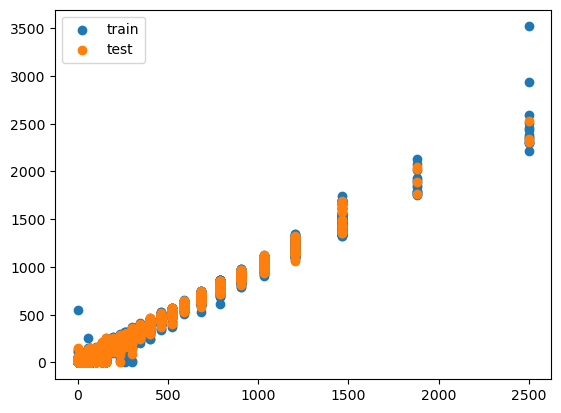

In [43]:
train_predictions = decision_tree.predict(X_train)
test_predictions = decision_tree.predict(X_test)
plt.scatter(train_predictions, y_train, label='train')
plt.scatter(test_predictions, y_test, label='test')
plt.legend()
plt.show()

In [50]:
# RANDOM FOREST CONSTRUCTION
#(George, n.d.)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
print(random_forest.score(X_train, y_train))
print(random_forest.score(X_test, y_test))

0.9986152150818011
0.9903051357088388


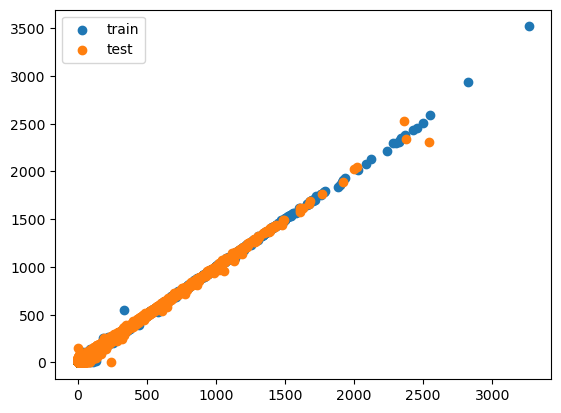

In [51]:
train_predictions_rf = random_forest.predict(X_train)
test_predictions_rf = random_forest.predict(X_test)
plt.scatter(train_predictions_rf, y_train, label='train')
plt.scatter(test_predictions_rf, y_test, label='test')
plt.legend()
plt.show()

### Part V: Data Summary and Implications

**E1. Results**
<br>In the context of the original research question and the initial model built to answer it: **A predictive model can be constructed from the dataset at a model accuracy of 70% or above, providing evidence to reject the null hypothesis.**

The MLR that provides an answer to this question provides coefficients for each predictor variable through its OLS output. For the sake of interpretability, the coefficients from the non-normalized model are used. The equation provided by the initial OLS output is as follows: 

**DEP_DELAY_NEW = 12.3105 + DAY_OF_WEEK(0.0203) - TAXI_OUT(0.4289) - TAXI_IN(0.3568) + ARR_DELAY_NEW(1.1366) - AIR_TIME(0.1429) + DISTANCE(0.0174) - CARRIER_DELAY(0.1191) - WEATHER_DELAY(0.1358) - NAS_DELAY(0.2926) - SECURITY_DELAY(0.0825) - LATE_AIRCRAFT_DELAY(0.1052)**

Interpretation of the coefficients: 
* When all other variables are 0, departure is delayed by 12.3105 minutes.
* All else equal, departure delay increases by 0.0203 minutes as the week goes on (1=Monday, 7=Sunday).
* All else equal, departure delay decreases by 0.4289 minutes for every 1 minute of taxi out time.
* All else equal, departure delay decreases by 0.3568 minutes for every 1 minute of taxi in time.
* All else equal, departure delay increases by 1.1366 minutes for every 1 minute of arrival delay.
* All else equal, departure delay decreases by 0.1429 minutes for every 1 minute of air time.
* All else equal, departure delay increases by 0.0174 minutes for every 1 mile of distance traveled.
* All else equal, departure delay decreases by 0.1191 minutes for every 1 minute of carrier delay.
* All else equal, departure delay decreases by 0.2926 minutes for every 1 minute of NAS delay.
* All else equal, departure delay decreases by 0.0825 minutes for every 1 minute of security delay.
* All else equal, departure delay decreases by 0.1052 minutes for every 1 minute of late aircraft delay.

As mentioned, this model is sufficient in answering the research question at the simplest level. However, it is important to corroborate these findings with the additional analysis techniques referenced previously: 
* *Residual analysis*: A residual plot was visualized with fitted values on the x-axis and residuals on the y-axis. A horizontal line is included to demonstrate whether or not residuals are clustered around 0. A "good" residual plot has the following characteristics: symmetrical distribution, clustering around lower single-digits of the y-axis, and no clear patterns (Qualtrics, n.s.). Upon inspection of this residual plot, it is evident that there is a clear trend in the residuals. This trend suggests that the model has room for improvement in terms of its accuracy in predicting values for the dependent variable. The residual standard error for the model was also calculated and came out to 0.137. The residual standard error (RSE) measures of the typical size of residuals, or how much the predictions are typically off by. The smaller the RSE, the more accurate the model is at predicting outcomes of the dependent variable. An RSE of 0.137 indicates that this model's predicted values of DEP_DELAY_NEW are typically off by approximately 13.7%.

* *Q-Q plot*: The Q-Q plot further inspects the model's residuals, and compares their distribution to a normal distribution. Ideally, the points align closely to a normal distribution, represented by the graph's red line. Examining the pattern of the points, it is clear that these points do not align well with the normal distribution trend line. Therefore, the assumption of normality in MLR is violated.

* *VIF*: VIF was calculated for each of the predictor variables in the original model. All but four of the original variables were dropped due to high VIF values, indicating high multicollinearity; the variables that met the VIF threshold (VIF < 10) -- SECURITY_DELAY, TAXI_OUT, TAXI_IN, DAY_OF_WEEK -- were used to create a reduced OLS model. This model was evaluated on the same criteria as the initial model: r-squared and Prob (F-statistic). This model had a much lower r-squared score of 0.003, compared to the initial model's r-squared score of 0.981. Therefore, this reduced model failed to reject the null hypothesis as the evidence suggested that a predictive model with an accuracy of 70% or above could not be built on these predictor variables. Assessing predictor variables' VIF addresses the assumption of multicollinearity in MLR. An assumption of MLR is that no multicollinearity exists among predictor variables. Results are ambiguous here, as the model with multicollinearity is far more accurate than the model without multicollinearity.

* *Decision tree*: The decision tree constructed using these predictor variables performs well, with an accuracy score of 97.3% on the test data. While this is slightly lower than the accuracy score of the initial model, 0.981, MLR assumptions do not hold for decision trees, thus this accuracy score is a much better indicator of success. 

* *Random forest*: The random forest has the highest accuracy score of any of the other techniques utilized in this analysis, at 0.999, suggesting this may be a better technique for building a predictive model in this case. A more in-depth explanation of this is found in section E5 below.

**E2. Implication(s) of results**
<br>The implication of the results is that a conclusion is ambiguous due to the null hypothesis being rejected but the assumptions of MLR being violated.

**E3. Limitation**
<br>This model is limited by the fact that the assumptions of MLR are violated.

To reiterate, the assumptions of MLR are: 
* There is a linear relationship between the explanatory variables and the response variable.
    * *This assumption is violated: The bivariate visualizations in section C3 do not indivate linear relationships between the dependent variable and any of the predictor variables.*
* Multivariate normality is upheld. In other words, residual values are normally distributed.
    * *This assumption is violated: Residuals are not normally distributed, as evidenced by the residual plot for the model.*
* No multivariate collinearity exists, meaning explanatory variables are not highly correlated with one another.
    * *This assumption is violated: A high amount of multicollinearity exists in the model, with just 4 of 11 predictor variables meeting the threshold for retention.*
* Homoscedasticity is evident. The variance of error terms are similar for each explanatory variable.
    * *This assumption is violated: The variance of error terms are not similar, as evidenced by the Q-Q plot for the model.*

**E4. Recommended course of action**
<br>Based on the results of this study, it cannot be recommended that the MLR equation calculated by the initial OLS model be used in making business decisions. Even though the null hypothesis is rejected because the evidence shows that it is possible to build a statistically significant model with an accuracy of 70% or greater, the model is limited in that it violates the assumptions of MLR. 

**E5. Directions for future study**
<br>*1. Use random forest to generate a predictive model*: The random forest model constructed here returned the highest accuracy score of any of the models tested in this analysis, at 0.999. This suggests that the dependent variable in this study, DEP_DELAY_NEW (departure delay, in minutes) can be better predicted by a random forest model. As noted previously, the data used in this study does not uphold the assumptions of MLR. The assumptions for random forests, however, are not as strict as MLR, and it is possible that they could be met by this data set. The assumptions of random forest are: 1) There are actual values contained in the predictor variables, rather than estimations, 2) Missing values are treated in the data set, and 3) predictions from each tree must have very low correlations (Shruti, 2023).

*2. Select a different subset of predictor variables for MLR*: This study referenced in Part II that a challenge, or disadvantage, of having a large number of predictor variables to select from when building an initial model, is selecting the optimal ones. Of the 120 variables that exist in the data set obtained from USDOT, there are many different subsets of variables that could be tested to answer the research question addressed in this study. It is possible that a different subset of predictor variables could still provide evidence to reject the null hypothesis and build a model with 70% or greater accuracy, while also meeting all of the assumptions of MLR. Further analysis is needed to investigate this.

**E5. Sources**
<br>Anupkumar, Ashmith. (2023). Investigating the Costs and Economic Impact of Flight Delays in the Aviation Industry and the Potential Strategies for Reduction. Electronic Theses, Projects, and Dissertations, 1653. Retrieved from https://scholarworks.lib.csusb.edu/etd/1653

Badole, M. (2024, January 17). Multiple linear regression : Definition , Example and Applications. Analytics Vidhya. Retrieved March 1, 2024, from https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

Chatterjee, S. (2023, August 14). The Top 5 Industries Where Python Coding Skills are Highly Valued. Emeritus. Retrieved March 2, 2024, from https://emeritus.org/blog/python-for-data-analysis/

George, N. (n.d.). Machine Learning for Finance in Python. DataCamp. Retrieved March 1, 2024, from https://campus.datacamp.com/pdf/web/viewer.html?file=https://projector-video-pdf-converter.datacamp.com/6578/chapter2.pdf#page=19

IBM Cloud Team. (2021, March 23). Python vs. R: What’s the Difference? IBM. Retrieved February 28, 2024, from https://www.ibm.com/blog/python-vs-r/

Kalliguddi, A. M., & Leboulluec, A. K. (2017). Predictive Modeling of Aircraft Flight Delay. Universal Journal of Management. https://doi.org/10.13189/ujm.2017.051003

Psuik, B. (2024). D208: Predictive Modeling. https://github.com/baileypsuik/WGU-MSDA/blob/main/Psuik_D208_Predictive-Modeling_pt1_PA.ipynb

[Mark Keith]. (2021, October 11). Python: Intro to MLR / OLS in statsmodels.Api [Video]. YouTube. https://www.youtube.com/watch?v=0-fkgpK2knA&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=8

[Mark Keith]. (2021, October 11). Python: MLR with categorical values; dummy codes [Video]. YouTube. https://www.youtube.com/watch?v=tJCgvR4E7uc&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=9

[Mark Keith]. (2021, October 11). Python: MLR, OLS, standardization, normalization [Video]. YouTube. https://www.youtube.com/watch?v=QH_elD_JKuc&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=10

[Mark Keith]. (2021, October 11). Python: MLR/OLS assumptions normality multicollinearity VIF [Video]. YouTube. https://www.youtube.com/watch?v=9-M4SGzSx0k&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=11

Shruti, M. (2023, February 23). Introduction to Random Forest in R. SimpliLearn. Retrieved March 2, 2024, from https://www.simplilearn.com/tutorials/data-science-tutorial/random-forest-in-r#assumptions_for_the_random_forest_algorithm

Statistics Solutions (n.d.). Assumptions of Multiple Linear Regression. Complete Dissertation. Retrieved January 1, 2024, from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/

United States Department of Transportation. (2023, November 1). On-Time: Marketing Carrier On-Time Performance (Beginning January 2018). Bureau of Transportation Statistics. Retrieved February 22, 2024, from https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGK

(2023, January 10). Qqplot (Quantile-Quantile Plot) in Python. Geeks for Geeks. Retrieved March 2, 2024, from https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

(2023, November 2). Disadvantages of Python. Geeks for Geeks. Retrieved March 2, 2024, from https://www.geeksforgeeks.org/disadvantages-of-python/

(2013, January 2). Quantile-Quantile Plot using SciPy. StackOverflow. Retrieved March 2, 2024, from https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scip

(n.d.). Interpreting Residual Plots to Improve Your Regression. Qualtrics. Retrieved March 2, 2024, from https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/

(2023, June 12). SAS vs R vs Python. Geeks for Geeks. Retrieved February 28, 2024, from https://www.geeksforgeeks.org/sas-vs-r-vs-python/